In [1]:
# Author: Vrushali Ritesh Koli
# Date: 2020/03/04
# CS301-006, Professor Watson
# HW5 Solution
# Data visualization exercise and critique on a sample student class dataset
# https://github.com/vkoli/cs301-hw
# 
# master

## General Set-Up

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import os

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pwd

/home/toph/Documents/cs301


In [4]:
data_dir = '/home/toph/Documents/cs301/'
student_file = data_dir + 'student_class.csv'
df = pd.read_csv(student_file, index_col=0)
df.head()

,Name,Midterm,Final,Attendance,HW,Final Average,Final Letter,Numeric Bin,Majors
0,Ariel,89,92,9,9,86.0,B+,80.0,BNFO
1,Brody,92,93,10,9,89.0,A,80.0,BNFO
2,Debra,76,88,8,6,74.0,C+,70.0,MATH
3,Rex,90,83,10,10,88.0,B+,80.0,MATH
4,Jerry,67,85,7,5,66.0,D,60.0,BNFO


In [5]:
df.shape

(150, 9)

## Problem 1

In [6]:
# creates an empty dataframe with columns Majors, Midterm, Final, Final Average
majors = df['Majors'].unique()
col_names = ['Majors', 'Midterm', 'Final', 'Final Average']
majors_df = pd.DataFrame(columns = col_names)
majors_df['Majors'] = majors
majors_df

,Majors,Midterm,Final,Final Average
0,BNFO,NaN,NaN,NaN
1,MATH,NaN,NaN,NaN
2,IS,NaN,NaN,NaN
3,CS,NaN,NaN,NaN
4,IT,NaN,NaN,NaN


In [7]:
# function to get the median of a column constrained by the major
def get_median(df, col, major):
    col_major = df.loc[ df['Majors'] == major ] 
    median = col_major[col].median()
    return median

test = get_median(df, 'Final', 'BNFO')
print(test)
test = get_median(df, 'Final Average', 'CS')
print(test)

90.5
72.69999999999999


In [8]:
# fill in the majors_df with approproate values
for major in majors_df['Majors']:
    midterm_med = get_median(df, 'Midterm', major)
    final_med = get_median(df, 'Final', major)
    final_avg_med = get_median(df, 'Final Average', major)
    majors_df.loc[ (majors_df['Majors'] == major), 'Midterm' ] = midterm_med
    majors_df.loc[ (majors_df['Majors'] == major), 'Final' ] = final_med
    majors_df.loc[ (majors_df['Majors'] == major), 'Final Average' ] = final_avg_med

majors_df

,Majors,Midterm,Final,Final Average
0,BNFO,87.5,90.5,75.05
1,MATH,84.5,80.5,74.3
2,IS,73,81,71.8
3,CS,82,74.5,72.7
4,IT,82.5,80.5,74.8


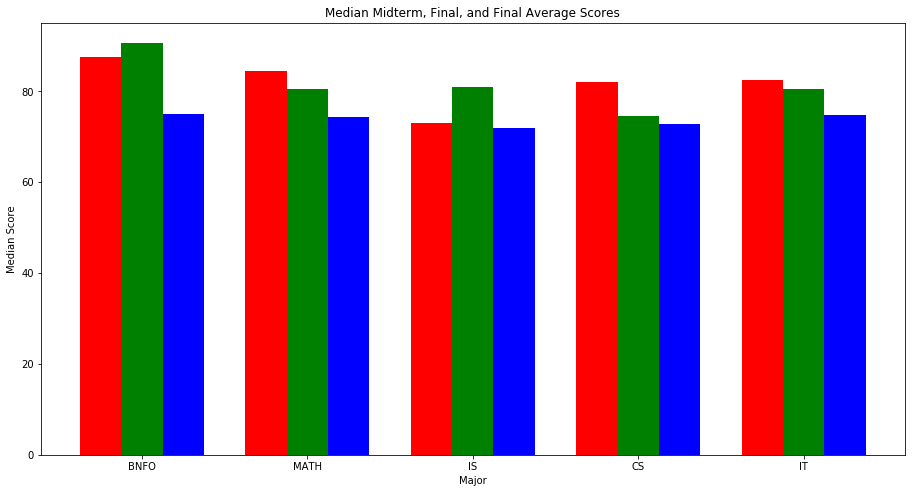

In [10]:
# plot the majors_df bar graph

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)
ax = fig.add_axes([0,0,1,1])
bar_width = 0.5
ax.bar(x + 0.00, majors_df['Midterm'], color = 'r', width = 0.25)
ax.bar(x + 0.25, majors_df['Final'], color = 'g', width = 0.25)
ax.bar(x + 0.50, majors_df['Final Average'], color = 'b', width = 0.25)
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Median Score')
plt.xlabel('Major')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(majors_df['Majors'])
plt.title('Median Midterm, Final, and Final Average Scores')
plt.show()

- Data items are the majors--> (BNFO, MATH, IS, CS, IT)
- Attributes are the median scores for Midterm, Final, and Final Average which are all quantitative data 
- Marks --> bar areas
- Channels --> vertical position of the bars, grouping of the bars per major, and the different colors

It would appear that those majoring in BNFO are doing better than the rest of the majors because BNFO has more bars that appear higher than the rest. It looks like IS majors are doing the worst because their bars are lower than the rest. The group of bars have a very starck contrast coming from the colors that adds emphasis to the length of the bar. If there were values above the bars, it may be easier to tell the difference between the bars.

## Problem 2

In [20]:
df.head()

,Name,Midterm,Final,Attendance,HW,Final Average,Final Letter,Numeric Bin,Majors
0,Ariel,89,92,9,9,86.0,B+,80.0,BNFO
1,Brody,92,93,10,9,89.0,A,80.0,BNFO
2,Debra,76,88,8,6,74.0,C+,70.0,MATH
3,Rex,90,83,10,10,88.0,B+,80.0,MATH
4,Jerry,67,85,7,5,66.0,D,60.0,BNFO


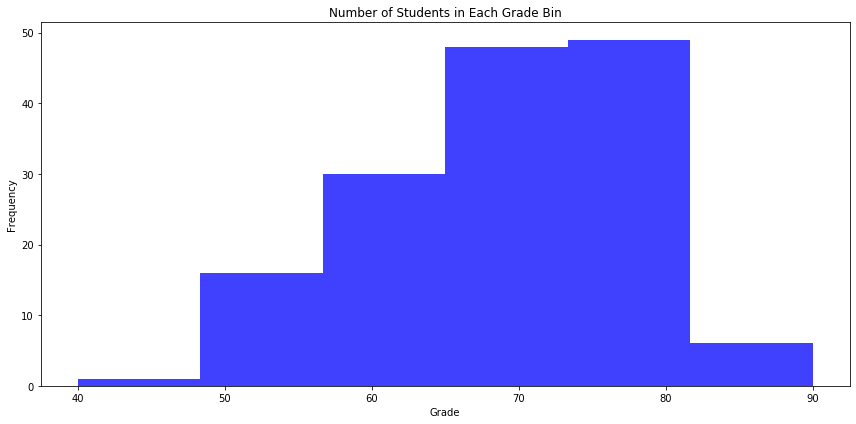

In [40]:
num_bins = 6
x = df['Numeric Bin']

n, bins, patches = plt.hist(x, num_bins, alpha=0.75, facecolor='blue')
plt.ylabel('Frequency')
plt.xlabel('Grade')
plt.title('Number of Students in Each Grade Bin')
plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show()

- Data items are the Number of Students in each Grade Bin 
- Attributes are the frequency for each Grade Bin which is all quantitative/numerical data 
- Marks --> bar areas
- Channels --> vertical position of the bars, and the colors of the bar

I would add more clear labelling, what grades are looking at specifically(Final, Midterm, Average, etc) and possibly add the total of each bar at the top each bar. The histogram looks skewed left as most of data appears towards the right of the graph.

## Problem 3

In [43]:
df.head()

,Name,Midterm,Final,Attendance,HW,Final Average,Final Letter,Numeric Bin,Majors
0,Ariel,89,92,9,9,86.0,B+,80.0,BNFO
1,Brody,92,93,10,9,89.0,A,80.0,BNFO
2,Debra,76,88,8,6,74.0,C+,70.0,MATH
3,Rex,90,83,10,10,88.0,B+,80.0,MATH
4,Jerry,67,85,7,5,66.0,D,60.0,BNFO


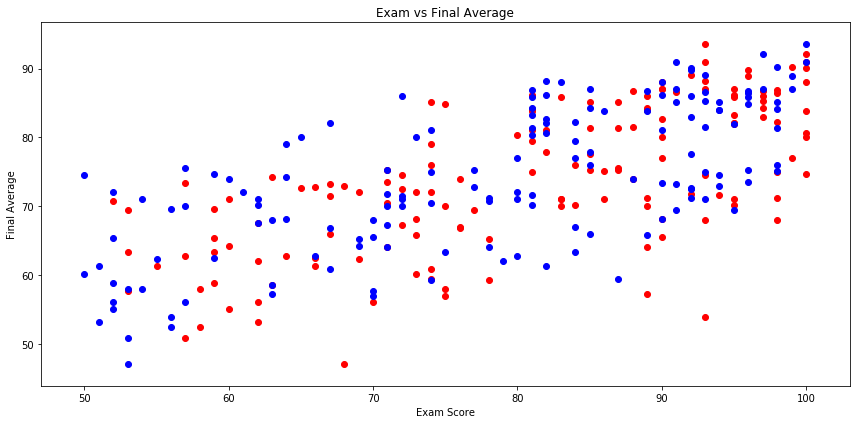

In [52]:
plt.scatter(df['Midterm'], df['Final Average'], color='r')
plt.scatter(df['Final'], df['Final Average'], color='b')
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Final Average')
plt.xlabel('Exam Score')
plt.title('Exam vs Final Average')
plt.tight_layout()
plt.show()

- Data items are the Final and Midterm Exam Scores for each student
- Attributes are the Final Average score associated with the exam scores which is quantitative/numerical data
- Marks --> scatter points
- Channels --> x & y position of each point, and the different colors used to distinguish points

Its very hard to tell whether the midterm & final exam scores are indictive of the final avg. score because there is no correlation that is deterministic. A scatter plot only suggests that there may be a correlation. It appears that the higher the midterm/final grade, the higher the final avg. If we were to plot a trendline, there would be too many points far away from the line.